In [1]:
# Essential Libraries
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler

# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
import seaborn as sb


In [2]:
df = pd.read_csv('final_df_time_series.csv')
df.head()

,Unnamed: 0,Region,Country/Territory,2011,2021,Type,2015,2019,2010,Country Code,Year,Value,2017
0,0,Middle East and North Africa,Afghanistan,7.6,10.9,Country,6.6,9.2,8.6,AFG,2017,9.59,9.6
1,1,Europe,Albania,2.8,10.2,Country,12.0,9.0,4.5,ALB,2017,10.08,10.1
2,2,Middle East and North Africa,Algeria,7.0,7.1,Country,6.8,6.7,8.5,DZA,2017,6.73,6.7
3,3,Europe,Andorra,5.4,9.7,Country,11.0,7.7,6.6,AND,2017,7.97,8.0
4,4,Africa,Angola,2.9,4.6,Country,3.3,4.5,3.5,AGO,2017,3.94,3.9


In [107]:
new_df = df[['2010', '2011', '2015', '2017', '2019', '2021']]
new_series = new_df.to_numpy() #converted to an array to fit into SOM algo 
som = MiniSom(3, 2,len(new_series[0]), sigma=0.4, 
              learning_rate = 0.05)

som.random_weights_init(new_series)
som.train(new_series, 10000)
cluster_df = som.win_map(new_series)


In [103]:
error = 0

for i in range(3):
    for j in range(2):
        coord = (i,j)
        cluster_array = cluster_df[coord]
        avg = np.average(np.vstack(cluster_array), axis = 0)
        for k in range(len(cluster_array)):
            out_arr = np.subtract(cluster_array[k], avg)
            for l in out_arr:
                error += l**2
prin
print (error)

5240.817703416143


In [91]:
sig = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
lr = [0.1, 0.01, 0.001]
error_array =[]

for a in lr:
    for b in sig:
        error = 0
        som = MiniSom(3, 2,len(new_series[0]), sigma=b, learning_rate = a)
        som.random_weights_init(new_series)
        som.train(new_series, 10000)
        cluster_df = som.win_map(new_series)
        
        for i in range(3):
            for j in range(2):
                coord = (i,j)
                cluster_array = cluster_df[coord]
                avg = np.average(np.vstack(cluster_array), axis = 0)
                for k in range(len(cluster_array)):
                    out_arr = np.subtract(cluster_array[k], avg)
                    for l in out_arr:
                        error += l**2
        error_array.append(error)
print (error_array)
print (min(error_array))
print (error_array.index(min(error_array)))

[5124.97615265478, 4727.296260848281, 5124.976152654795, 5206.390998427677, 4596.676729928584, 5185.946823253072, 5213.0233220165965, 5185.946823253072, 5252.790191223852, 4843.246311389765, 4839.422207129016, 4760.720839399088, 5372.52066395664, 4850.557110165899, 5276.663357066291, 5258.094921178588, 5260.508231846131, 5308.671676858995, 6765.962730867884, 5251.351470135263, 6400.84168088448, 7080.342353439155, 5728.7846762022755, 6747.615817772311, 6043.7036278586, 5512.582015287454, 5807.840440338912]
4596.676729928584
4


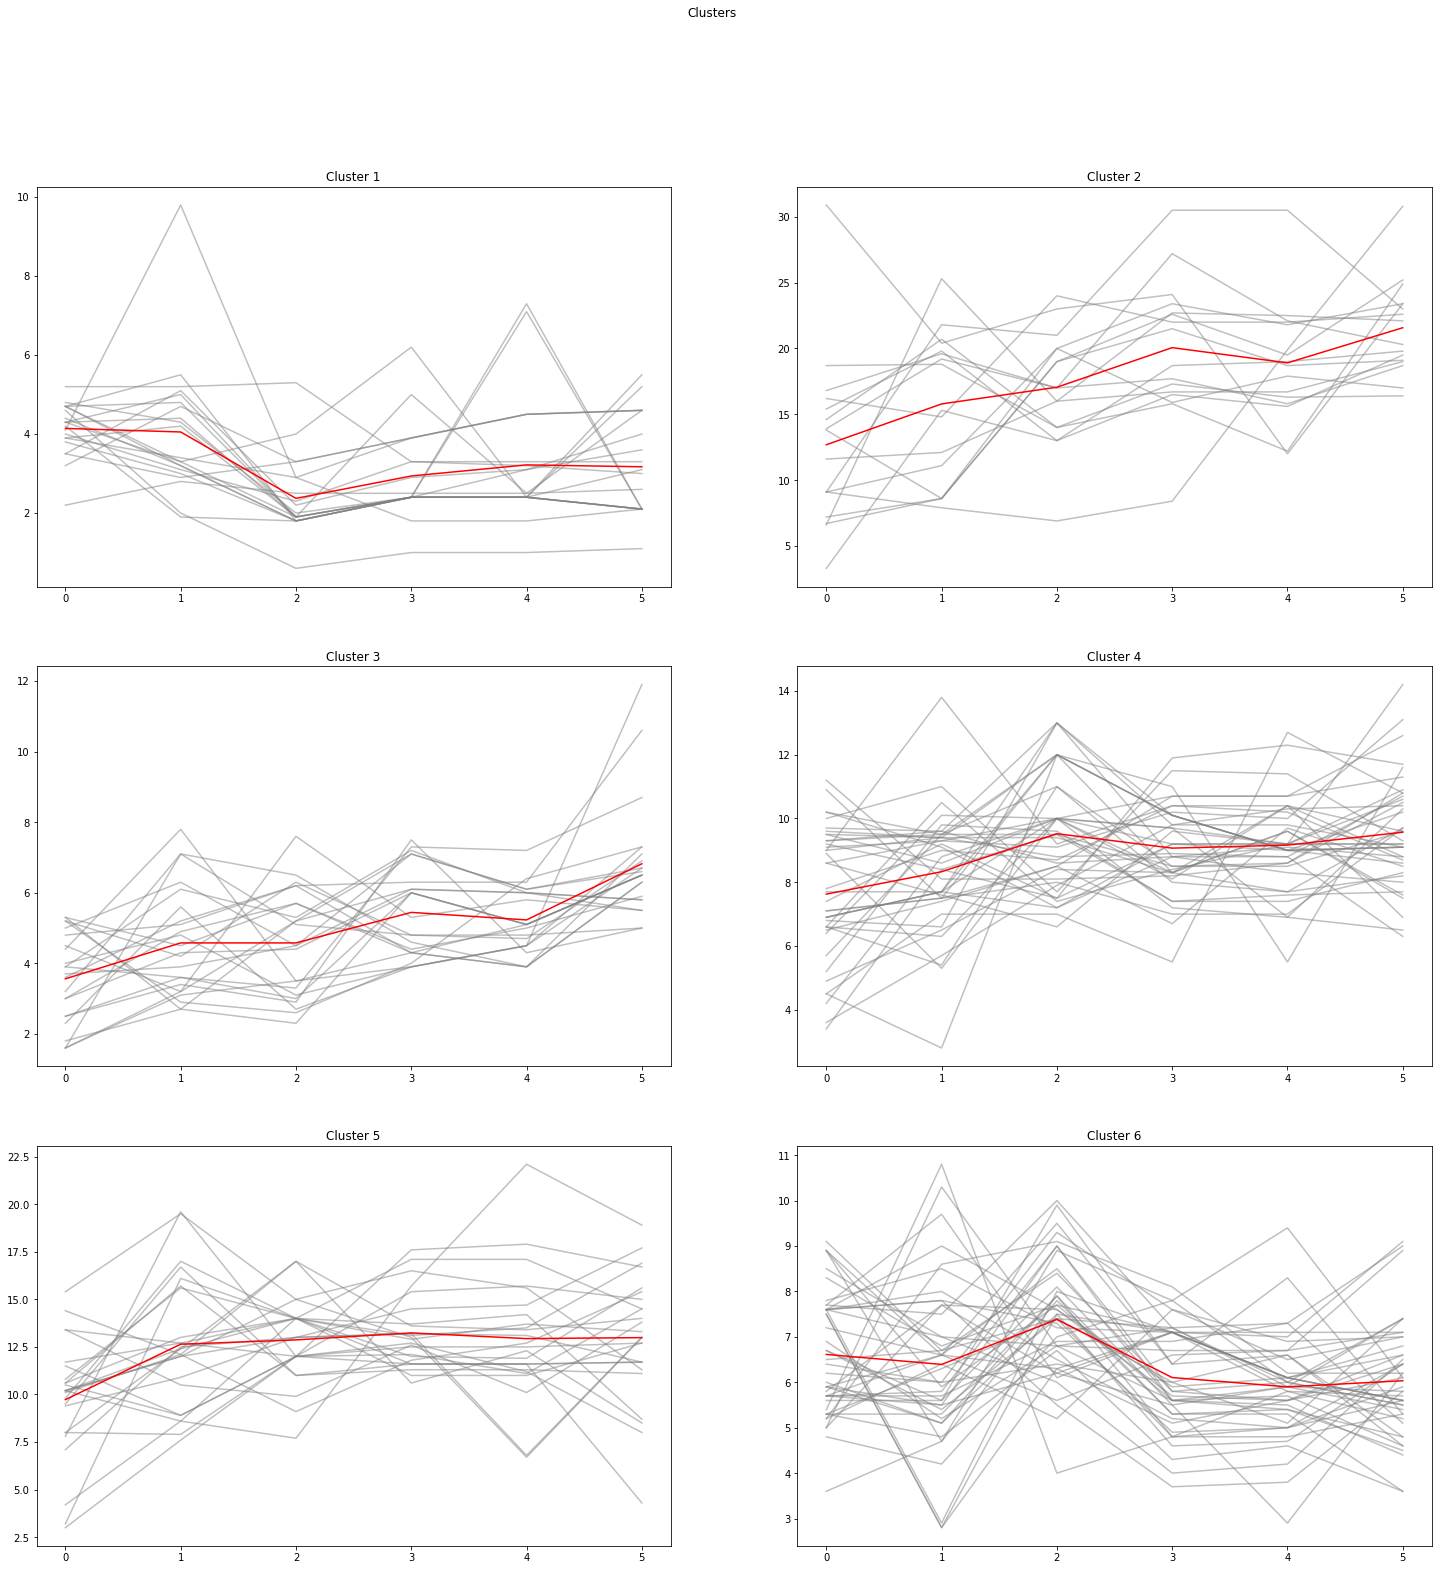

In [108]:
def plot_som_series_averaged_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(25,25))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(np.average(np.vstack(win_map[cluster]),axis=0),c="red")
            cluster_number = x*som_y+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()
    
win_map = som.win_map(new_series)
# Returns the mapping of the winner nodes and inputs

plot_som_series_averaged_center(3, 2, win_map)

In [43]:
clusters = []
for i in new_series:
    coord = som.winner(i)
    cluster = coord[0] * 2 + coord[1]+1
    clusters.append(cluster)
print (clusters)


[1, 1, 1, 1, 5, 3, 4, 1, 3, 4, 1, 4, 6, 3, 3, 4, 4, 6, 5, 3, 1, 3, 2, 3, 3, 1, 5, 5, 5, 4, 1, 3, 4, 4, 2, 3, 3, 1, 3, 3, 4, 3, 3, 1, 4, 3, 3, 4, 1, 4, 5, 2, 5, 6, 4, 4, 6, 1, 4, 1, 5, 4, 3, 6, 3, 5, 3, 1, 1, 1, 4, 3, 1, 3, 5, 1, 4, 3, 4, 3, 1, 5, 6, 6, 4, 3, 5, 5, 3, 1, 2, 4, 5, 2, 6, 1, 5, 1, 6, 5, 6, 6, 4, 2, 3, 1, 5, 2, 2, 6, 4, 4, 6, 1, 3, 5, 5, 4, 3, 6, 6, 1, 6, 1, 4, 1, 1, 3, 3, 6, 1, 5, 1, 1, 5, 6, 5, 3, 3, 5, 3, 1, 6, 4, 1, 1, 3, 6, 3, 4, 4, 4, 1, 5, 6, 3, 3, 3, 4, 6, 5, 4, 6, 2, 1, 4, 3, 2, 2]


<AxesSubplot:xlabel='count', ylabel='cluster'>

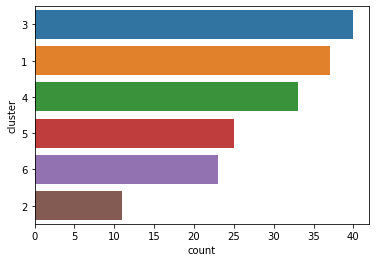

In [44]:
cluster_df = pd.DataFrame(clusters, columns = ['cluster'])
countries_list = df[['Country/Territory', 'Region']]
clean_df = pd.concat([countries_list, cluster_df], axis =1)
sb.countplot(y="cluster", data=clean_df,
                order = clean_df['cluster'].value_counts().index)


In [46]:
clean_df[clean_df['cluster'] == 6]

,Country/Territory,Region,cluster
12,Bahrain,Middle East and North Africa,6
17,Belize,North America and Caribbean,6
53,Fiji,Western Pacific,6
56,French Polynesia,Western Pacific,6
63,Guam,Western Pacific,6
82,Kiribati,Western Pacific,6
83,Kuwait,Middle East and North Africa,6
94,Malaysia,Western Pacific,6
98,Marshall Islands,Western Pacific,6
100,Mauritius,South-East Asia,6


In [47]:
clean_df.to_csv('final_countries_cluster.csv', index=False) #storing clean_cluster


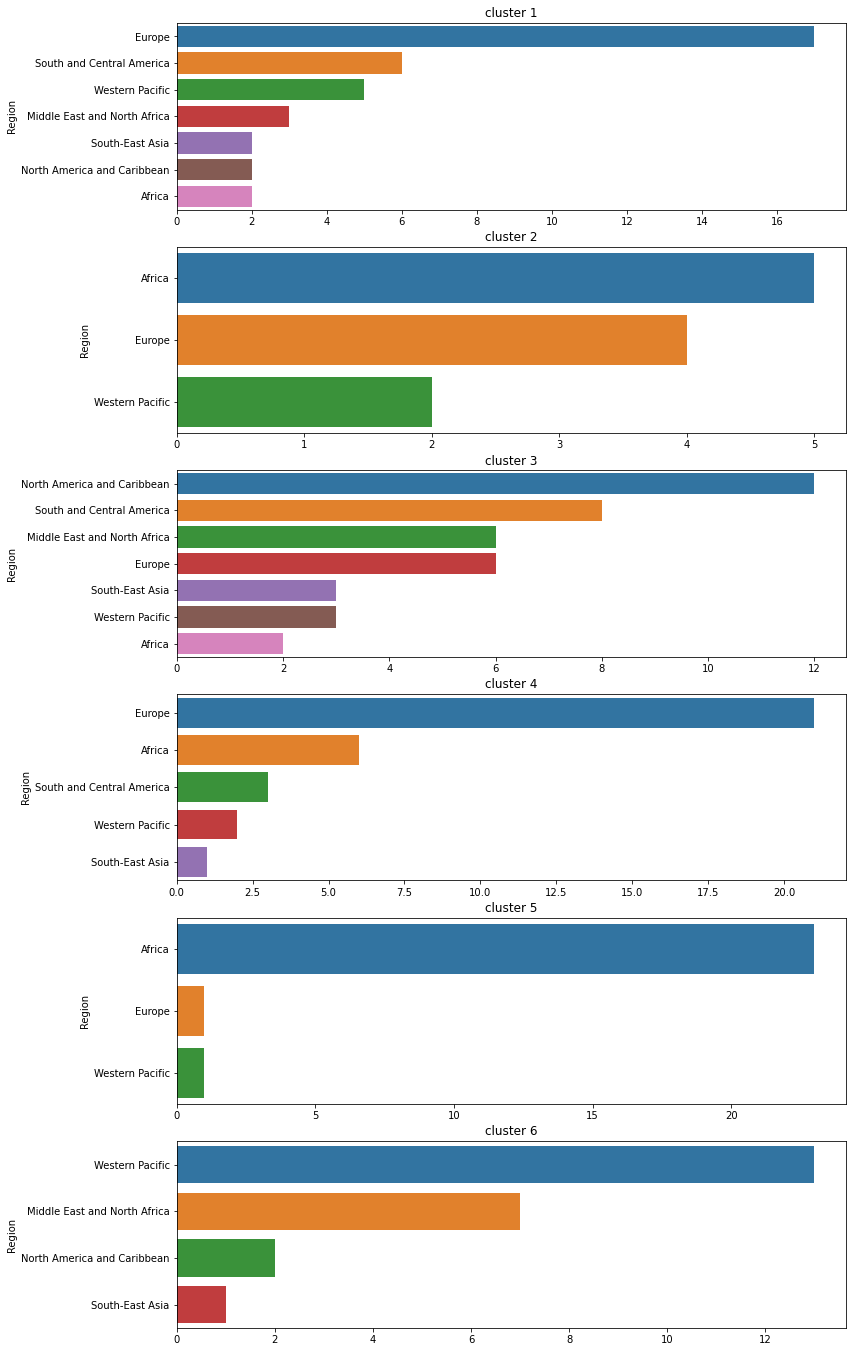

In [50]:
clean_df = pd.read_csv('final_countries_cluster.csv')
clusters_unique = clean_df['cluster'].unique()
clusters_unique = np.sort(clusters_unique)
f, axes = plt.subplots(len(clusters_unique), 1, figsize=(12, 24))
count=0
for i in clusters_unique:
    df_cluster = clean_df[clean_df['cluster'] == i]
    a = str(i)
    a = 'cluster ' + a
    axes[count].set_title(a)
    sb.countplot(y="Region", data=df_cluster,
                order = df_cluster['Region'].value_counts().index, 
                ax = axes[count]).set(xlabel = None)
    count += 1

C:\Users\brndk\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


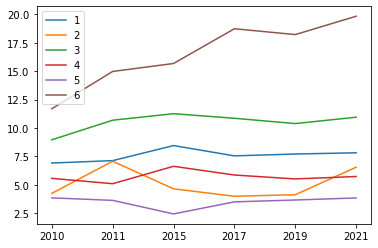

In [49]:
plot_df = pd.merge(clean_df, df, on = 'Country/Territory')
plot1_df = plot_df[['cluster', '2010', '2011', 
                  '2015', '2017', '2019', '2021']]

df101 = plot1_df.groupby(['cluster']).mean()
for i in range(6):
    plt.plot(df101.iloc[i,:], label = i+1)
plt.legend()
plt.show()